In [1]:
#Importing necassary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#reading data file then verifying it's read correctly
data = pd.read_csv("SampleSuperstore.csv")
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
#geting some quick insights in the data
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [4]:
#checking data type foea rach column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [5]:
## change postal code from int64 to object
data['Postal Code']=data['Postal Code'].astype('str')

In [6]:
#Checking if converted
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   object 
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(1), object(9)
memory usage: 1015.1+ KB


In [7]:
#checking the shape of our data(columns,rows)
data.shape

(9994, 13)

In [8]:
#checking missing values
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

#### No missing values found

In [9]:
#Checking for wrong entries like symbols -,?,#,*,etc.
for col in data.columns:
    print('{} : {}'.format(col,data[col].unique()))


Ship Mode : ['Second Class' 'Standard Class' 'First Class' 'Same Day']
Segment : ['Consumer' 'Corporate' 'Home Office']
Country : ['United States']
City : ['Henderson' 'Los Angeles' 'Fort Lauderdale' 'Concord' 'Seattle'
 'Fort Worth' 'Madison' 'West Jordan' 'San Francisco' 'Fremont'
 'Philadelphia' 'Orem' 'Houston' 'Richardson' 'Naperville' 'Melbourne'
 'Eagan' 'Westland' 'Dover' 'New Albany' 'New York City' 'Troy' 'Chicago'
 'Gilbert' 'Springfield' 'Jackson' 'Memphis' 'Decatur' 'Durham' 'Columbia'
 'Rochester' 'Minneapolis' 'Portland' 'Saint Paul' 'Aurora' 'Charlotte'
 'Orland Park' 'Urbandale' 'Columbus' 'Bristol' 'Wilmington' 'Bloomington'
 'Phoenix' 'Roseville' 'Independence' 'Pasadena' 'Newark' 'Franklin'
 'Scottsdale' 'San Jose' 'Edmond' 'Carlsbad' 'San Antonio' 'Monroe'
 'Fairfield' 'Grand Prairie' 'Redlands' 'Hamilton' 'Westfield' 'Akron'
 'Denver' 'Dallas' 'Whittier' 'Saginaw' 'Medina' 'Dublin' 'Detroit'
 'Tampa' 'Santa Clara' 'Lakeville' 'San Diego' 'Brentwood' 'Chapel Hill'


In [10]:
#chking for duplicated entries of data
data.duplicated().sum()

17

In [11]:
#here we have 17 duplicated records that we can remove
data = data.drop_duplicates()

In [12]:
#cchecking if duplicated rows were dropped successfully
data.shape

(9977, 13)

#### 17 duplicates entries were removed

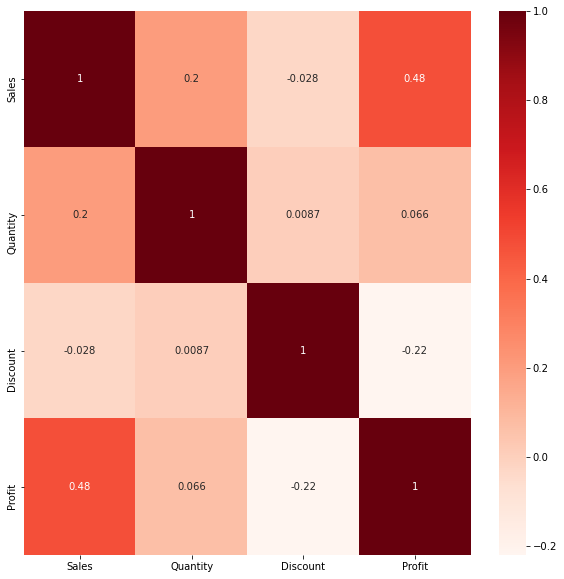

In [13]:
#checking for correlations between various variables
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),cbar=True,annot=True,cmap='Reds')


In [44]:
data.to_csv("data_cleaned.csv")

In [28]:
data.City.unique()

3398    Richmond
Name: City, dtype: object

In [29]:
top_cities = data.sort_values('Sales', ascending=False).head(5)
top_cities

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
2697,Standard Class,Home Office,United States,Jacksonville,Florida,32216,South,Technology,Machines,22638.480,6,0.5,-1811.0784
6826,Standard Class,Corporate,United States,Lafayette,Indiana,47905,Central,Technology,Copiers,17499.950,5,0.0,8399.9760
8153,First Class,Consumer,United States,Seattle,Washington,98115,West,Technology,Copiers,13999.960,4,0.0,6719.9808
2623,First Class,Home Office,United States,New York City,New York,10024,East,Technology,Copiers,11199.968,4,0.2,3919.9888
4190,Standard Class,Consumer,United States,Newark,Delaware,19711,East,Technology,Copiers,10499.970,3,0.0,5039.9856


In [17]:
top_cities['City'].head(1)

2697    Jacksonville
Name: City, dtype: object

### We can see that Jacksonville has the highest sales of all cities

In [18]:
top_cities_by_profit = data.sort_values('Profit', ascending=False).head(5)

In [19]:
top_cities_by_profit['City'].head(1)

6826    Lafayette
Name: City, dtype: object

### We can see that Lafayette has the highest sales of all cities

## Previous analysis raises the question that why Jacksonville despite gaving the highest sales of all cities does not have the highest profit too?

In [20]:
Lowest_cities = data.sort_values('Sales', ascending=True).head(5)

In [21]:
Lowest_cities['City'].head(1)

4101    Houston
Name: City, dtype: object

### We can see that Houston has the highest sales of all cities

In [22]:
Regions_data = data.groupby('Region').sum().sort_values('Sales',ascending=False)

In [23]:
Regions_data.head(1)

,Sales,Quantity,Discount,Profit
Region,,,,
West,725255.6365,12234,350.0,108329.8079


## West region has the highest profit and sales of all regions

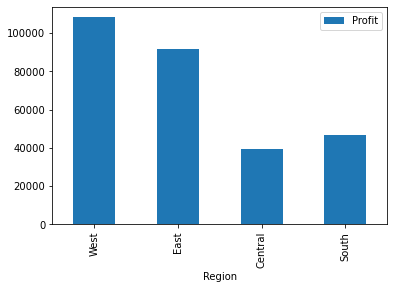

In [24]:
Regions_data.plot.bar(y='Profit');

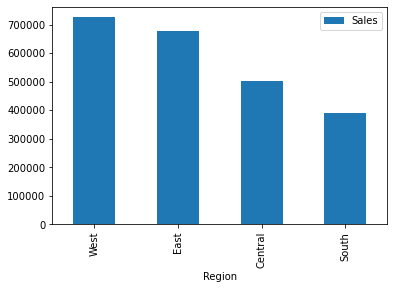

In [25]:
Regions_data.plot.bar(y='Sales');

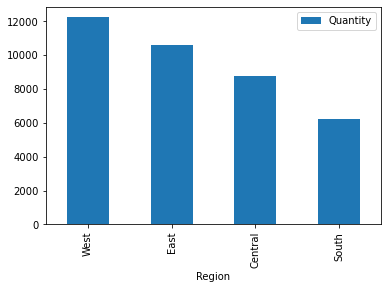

In [26]:
Regions_data.plot.bar(y='Quantity');

## As a business manager we should focus on east area as it shows potentials for gaining more profit and try to understand why Jacksonville despite having the highest sales doesn't have the highest profit

In [31]:
category_profit = data.groupby('Category').sum().sort_values('Sales',ascending=False)
category_profit

,Sales,Quantity,Discount,Profit
Category,,,,
Technology,836154.0330,6939,244.40,145454.9481
Furniture,741306.3133,8020,368.59,18421.8137
Office Supplies,718735.2440,22861,946.20,122364.6608


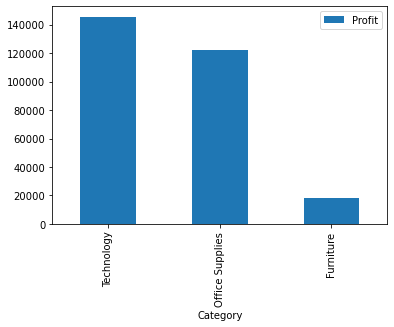

In [39]:
category_profit.sort_values(by='Profit',ascending=False).plot.bar(y='Profit');

## Technology has the highest profit of all categories

In [42]:
Sub_Category_profit = data.groupby('Sub-Category').sum().sort_values('Sales',ascending=False)
Sub_Category_profit

,Sales,Quantity,Discount,Profit
Sub-Category,,,,
Phones,330007.0540,3289,137.40,44515.7306
Chairs,327777.7610,2351,104.70,26567.1278
Storage,223843.6080,3158,63.20,21278.8264
Tables,206965.5320,1241,83.35,-17725.4811
Binders,203409.1690,5971,566.20,30228.0003
Machines,189238.6310,440,35.20,3384.7569
Accessories,167380.3180,2976,60.80,41936.6357
Copiers,149528.0300,234,11.00,55617.8249
Bookcases,114879.9963,868,48.14,-3472.5560


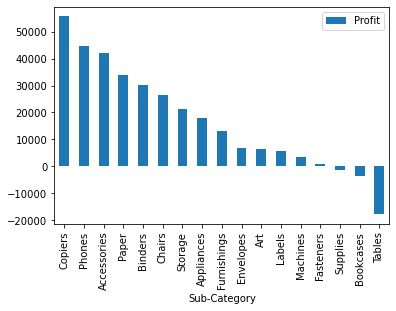

In [43]:
Sub_Category_profit.sort_values(by='Profit',ascending=False).plot.bar(y='Profit');

## Copiers has the highest profit of all sub categories while tables has the lowest profit